In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [7]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6768 entries, 1995-01-03 to 2021-11-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      6768 non-null   float64
 1   F       6768 non-null   float64
 2   XOM     6768 non-null   float64
 3   LNC     6768 non-null   float64
 4   AAPL    6768 non-null   float64
dtypes: float64(5)
memory usage: 317.2 KB


In [9]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1995-01-03,6.016425,4.380179,6.598667,9.169870,0.290447
1995-01-04,5.997509,4.498034,6.625879,9.216769,0.298016
1995-01-05,6.016425,4.458749,6.639483,9.184202,0.294231
1995-01-06,6.035347,4.458749,6.639483,9.184202,0.317883
1995-01-09,5.997509,4.537319,6.585063,9.053932,0.311852


In [8]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2021-11-10,27.420000,19.360001,64.190002,72.029999,147.919998
2021-11-11,27.410000,19.549999,64.309998,73.290001,147.869995
2021-11-12,27.379999,19.500000,63.820000,73.709999,149.990005
2021-11-15,27.549999,19.860001,64.370003,74.599998,150.000000
2021-11-16,27.799999,19.819099,65.250000,74.750000,151.154999


<AxesSubplot:xlabel='Date'>

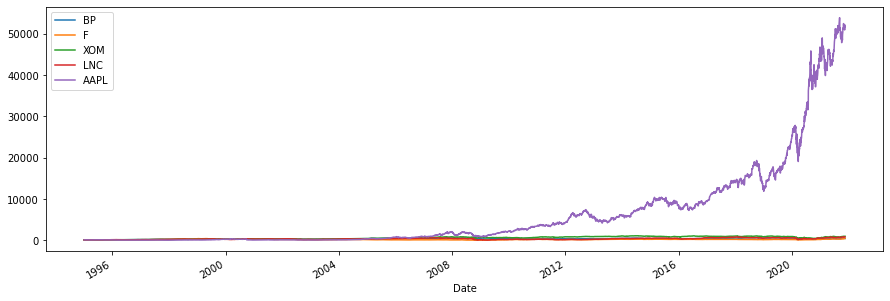

In [12]:
# Normalization
(mydata/mydata.iloc[0] * 100).plot(figsize = (15, 5))

<AxesSubplot:xlabel='Date'>

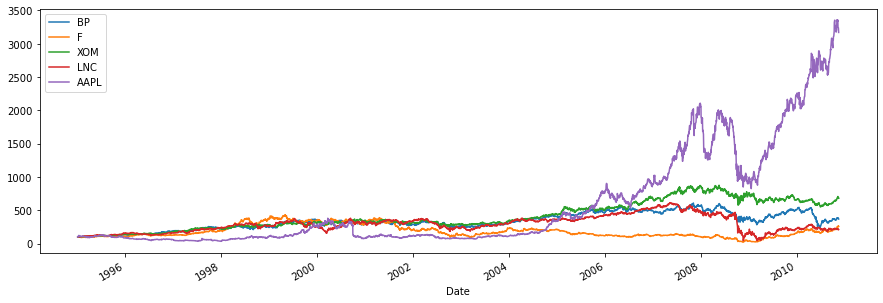

In [21]:
(mydata.head(4000)/mydata.iloc[0] * 100).plot(figsize = (15, 5))

In [ ]:
# Clearly apple has outperformed over the years. In the initial areas up to 1999 or so , shares of apple did not perform well.It took to pace after 2004-05. 

In [22]:
returns = (mydata / mydata.shift(1)) - 1

In [23]:
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1995-01-03,NaN,NaN,NaN,NaN,NaN
1995-01-04,-0.003144,0.026907,0.004124,0.005114,0.026060
1995-01-05,0.003154,-0.008734,0.002053,-0.003533,-0.012700
1995-01-06,0.003145,0.000000,0.000000,0.000000,0.080386
1995-01-09,-0.006269,0.017621,-0.008197,-0.014184,-0.018973


In [25]:
equal_weights = [0.2, 0.2, 0.2, 0.2, 0.2]
annual_returns = returns.mean()*250
print(annual_returns)

BP      0.098425
F       0.135442
XOM     0.117335
LNC     0.200042
AAPL    0.327633
dtype: float64


In [28]:
portfolio_return = str(round(np.dot(annual_returns, equal_weights), 5)*100) + ' %'
print(portfolio_return)

17.578 %
